<a href="https://colab.research.google.com/github/gabrielaaguiv5/ProyectoCDatos/blob/main/Gabriela_Aguilar_ProyectoChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gabriela Aguilar

# Proyecto Final: Análisis Exploratorio de Pérdida de Clientes (CHURN)

In [1]:
# Importando datos de documento 'Churn_Modelling' tipo cvs, cargado a repositorio de GitHub para facilidad de acceso

import pandas as pd

datos = pd.read_csv("https://raw.githubusercontent.com/gabrielaaguiv5/ProyectoCDatos/main/Churn_Modelling.csv",sep=',')

print()
datos.head(10) # Mostrar los 10 primeros registros del DataFrame

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [2]:
# Importando todas las librerias necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Para graficar
%matplotlib inline
import seaborn as sns
from collections import Counter
import math

# **Entregables del Proyecto**

# **1. Análisis Descriptivo:**

*   Revisión del tipo de datos y cantidad de registros.
*   Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).
*   Identificación y tratamiento de valores faltantes o duplicados.





---


---




1.   **Revisión del tipo de datos y cantidad de registros.**



In [3]:
# Revisión del tipo de datos y cantidad de registros.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Ajustar tipo de variables según el contenido de cada columna

# RowNumber: Identificador único para cada registro.
# CustomerId: Permite rastrear y diferenciar a cada cliente en el conjunto de datos.
# Surname: Proporciona información sobre el apellido del cliente.
# CreditScore: Valor numérico que evalúa la solvencia crediticia del cliente basado en su historial y comportamiento financiero.
# Geography: Indica la ubicación geográfica de los clientes.
# Gender: Categoriza a los clientes según su género.
# Age: Representa la edad del cliente en años.
# Tenure: Mide el tiempo (en años o meses) que el cliente ha estado vinculado al banco.
# Balance: Monto de dinero presente en la cuenta bancaria del cliente en un momento dado.
# NumOfProducts: Número de productos o servicios bancarios que utiliza el cliente.
# HasCrCard: Variable binaria que indica si el cliente posee una tarjeta de crédito (1) o no (0).
# IsActiveMember: Variable binaria que señala si el cliente es un miembro activo del banco (1) o no (0).
# EstimatedSalary: Aproximación del nivel de ingresos del cliente.
# Exited: Indicador que señala si el cliente ha abandonado (1) o se ha quedado (0) en el banco.

category_columns = ['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender']
columnas_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
boolean_columns = ['HasCrCard', 'IsActiveMember', 'Exited']

datos[category_columns] = datos[category_columns].astype('category')
datos[columnas_numericas] = datos[columnas_numericas].astype('float64')
datos[boolean_columns] = datos[boolean_columns].astype('bool')

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  category
 1   CustomerId       10000 non-null  category
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  float64 
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  float64 
 7   Tenure           10000 non-null  float64 
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  float64 
 10  HasCrCard        10000 non-null  bool    
 11  IsActiveMember   10000 non-null  bool    
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  bool    
dtypes: bool(3), category(5), float64(6)
memory usage: 1.3 MB


---


---


2.   **Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).**




Se hará el análisis de tanto las variables numéricas como las booleanas.

Con las variables booleanas será posible posteriormente calcular y analizar las tasas de abandono, de miembros activos y de clientes con tarjetas de crédito.


In [5]:
# Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).

CNum = datos[columnas_numericas]
CBool = datos[boolean_columns]

# Medidas de tendencia central

#Media
media = CNum.mean()
mediaBool = CBool.mean()
#Mediana
mediana = CNum.median()
medianaBool = CBool.median()
#Moda
moda = CNum.mode().iloc[0] # Para casos en que sea más de una moda
modaBool = CBool.mode().iloc[0] # Para casos en que sea más de una moda

# Imprimir resultados
print("Media:")
print(media)
print(mediaBool)
print("\nMediana:")
print(mediana)
print(medianaBool)
print("\nModa:")
print(moda)
print(modaBool)

print()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        media[col],
        mediana[col],
        moda[col],
    ])

for col in CBool.columns:
  table_data.append([
      col,
      mediaBool[col],
      medianaBool[col],
      modaBool[col],
    ])


# Define headers
headers = ["Variable", "Media", "Mediana", "Moda"]

# Print table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Media:
CreditScore           650.528800
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
EstimatedSalary    100090.239881
dtype: float64
HasCrCard         0.7055
IsActiveMember    0.5151
Exited            0.2037
dtype: float64

Mediana:
CreditScore           652.000
Age                    37.000
Tenure                  5.000
Balance             97198.540
NumOfProducts           1.000
EstimatedSalary    100193.915
dtype: float64
HasCrCard         1.0
IsActiveMember    1.0
Exited            0.0
dtype: float64

Moda:
CreditScore          850.00
Age                   37.00
Tenure                 2.00
Balance                0.00
NumOfProducts          1.00
EstimatedSalary    24924.92
Name: 0, dtype: float64
HasCrCard          True
IsActiveMember     True
Exited            False
Name: 0, dtype: bool

+-----------------+-------------+-----------+---------+
| Variable        |       Media |   Mediana |    Moda |

**Cálculo de Tasas para Análisis Churn**


1.   Porcentaje de clientes con Tarjeta de Crédito
2.   Tasa de Clientes Activos
3.   Tasa de Abandono de Clientes





In [50]:
Tasas = mediaBool*100
print("Porcentaje de clientes con Tarjeta de Crédito: ", Tasas['HasCrCard'], "%")
print("Tasa de Clientes Activos: ", Tasas['IsActiveMember'], "%")
print("Tasa de Abandono de Clientes: ", f"{Tasas['Exited']:2.2f}", "%")

Porcentaje de clientes con Tarjeta de Crédito:  70.55 %
Tasa de Clientes Activos:  51.51 %
Tasa de Abandono de Clientes:  20.37 %


In [7]:
# Medidas de variabilidad

#Varianza
varianza = CNum.var()
varianzabool = CBool.var()
#Desviación estandar
desvest = CNum.std()
desvestbool = CBool.std()
#Coeficiente de variación
CV = (desvest/media)*100
CVbool = (desvestbool/mediaBool)*100
#Rango
Rango = CNum.max() - CNum.min()
RangoBool = CBool.max() ^ CBool.min()

# Imprimir resultados
print("Varianza:")
print(varianza)
print(varianzabool)
print("\nDesviación estándar:")
print(desvest)
print(desvestbool)
print("\nCoeficiente de variación:")
print(CV)
print(CVbool)
print("\nRango:")
print(Rango)
print(RangoBool)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        varianza[col],
        desvest[col],
        CV[col],
        Rango[col]
    ])
for col in CBool.columns:
    table_data.append([
        col,
        varianzabool[col],
        desvestbool[col],
        CVbool[col],
        RangoBool[col]
    ])

# Define headers

headers = ["Variable", "Varianza", "Desviación estándar", "Coeficiente de variación", "Rango"]

# Print table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Varianza:
CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
EstimatedSalary    3.307457e+09
dtype: float64
HasCrCard         0.207791
IsActiveMember    0.249797
Exited            0.162223
dtype: float64

Desviación estándar:
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
EstimatedSalary    57510.492818
dtype: float64
HasCrCard         0.455840
IsActiveMember    0.499797
Exited            0.402769
dtype: float64

Coeficiente de variación:
CreditScore        14.857651
Age                26.945841
Tenure             57.695786
Balance            81.580283
NumOfProducts      38.011656
EstimatedSalary    57.458642
dtype: float64
HasCrCard          64.612398
IsActiveMember     97.029107
Exited            197.726354
dtype: float64

Rango:
CreditScore           500.00
Age    

In [8]:
# Medidas de forma

# Asimetría
asimetria = CNum.skew()
# Curtosis
curtosis = CNum.kurtosis()

# Imprimir resultados
print("Asimetría:")
print(asimetria)
print("\nCurtosis:")
print(curtosis)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        asimetria[col],
        curtosis[col]
    ])

# Define headers
headers = ["Variable", "Asimetría", "Curtosis"]

# Print table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Asimetría:
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
EstimatedSalary    0.002085
dtype: float64

Curtosis:
CreditScore       -0.425726
Age                1.395347
Tenure            -1.165225
Balance           -1.489412
NumOfProducts      0.582981
EstimatedSalary   -1.181518
dtype: float64
+-----------------+-------------+------------+
| Variable        |   Asimetría |   Curtosis |
+=================+=============+============+
| CreditScore     | -0.0716066  |  -0.425726 |
+-----------------+-------------+------------+
| Age             |  1.01132    |   1.39535  |
+-----------------+-------------+------------+
| Tenure          |  0.0109915  |  -1.16523  |
+-----------------+-------------+------------+
| Balance         | -0.141109   |  -1.48941  |
+-----------------+-------------+------------+
| NumOfProducts   |  0.745568   |   0.582981 |
+-----------------+-------------+------------+
|

In [9]:
# Medidas de posición

Q1 = CNum.quantile(0.25)
Q2 = CNum.quantile(0.50)
Q3 = CNum.quantile(0.75)

# Imprimir resultados

print("Q1:")
print(Q1)
print("\nQ2:")
print(Q2)
print("\nQ3:")
print(Q3)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        Q1[col],
        Q2[col],
        Q3[col]
    ])

# Define headers

headers = ["Variable", "Percentil 25", "Percentil 50", "Percentil 75"]

# Print table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


Q1:
CreditScore          584.00
Age                   32.00
Tenure                 3.00
Balance                0.00
NumOfProducts          1.00
EstimatedSalary    51002.11
Name: 0.25, dtype: float64

Q2:
CreditScore           652.000
Age                    37.000
Tenure                  5.000
Balance             97198.540
NumOfProducts           1.000
EstimatedSalary    100193.915
Name: 0.5, dtype: float64

Q3:
CreditScore           718.0000
Age                    44.0000
Tenure                  7.0000
Balance            127644.2400
NumOfProducts           2.0000
EstimatedSalary    149388.2475
Name: 0.75, dtype: float64
+-----------------+----------------+----------------+----------------+
| Variable        |   Percentil 25 |   Percentil 50 |   Percentil 75 |
+=================+================+================+================+
| CreditScore     |          584   |          652   |            718 |
+-----------------+----------------+----------------+----------------+
| Age            

In [10]:
# Descripción consolidada de las variables numéricas
CNum.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [11]:
# Descripción consolidada de las variables booleanas
CBool.describe()

,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000
unique,2,2,2
top,True,True,False
freq,7055,5151,7963




---



---

3.  **Identificación y tratamiento de valores faltantes o duplicados.**



In [12]:
# Identificación de valores faltantes

print(datos.isnull().sum()) # Valores faltantes en cada fila

print()

print("Valores faltantes en la totalidad de la Database:")

print(datos.isnull().any().any()) # Valores faltantes en la totalidad de la Database, revisa cada columna y genera resultado consolidado

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Valores faltantes en la totalidad de la Database:
False


In [13]:
# Identificación de valores duplicados

print(datos.duplicated().sum()) # Filas duplicadas

print()

print("Filas duplicadas en la totalidad de la Database:")
print(datos[datos.duplicated()])

0

Filas duplicadas en la totalidad de la Database:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


# **2. Visualizaciones:**

*   Histogramas y boxplots para analizar la distribución de variables numéricas (CreditScore,
Age, Balance, EstimatedSalary, etc.).
*   Gráficos de barras para variables categóricas (Geography, Gender, HasCrCard,
IsActiveMember).
*   Series temporales o análisis de tendencias (si se identifican datos relevantes en variables
como Tenure o comportamientos a lo largo del tiempo).
*   Matrices de correlación que faciliten la identificación de relaciones entre variables.




---

---

1.   **Histogramas y boxplots para analizar la distribución de variables numéricas (CreditScore, Age, Balance, EstimatedSalary, etc.).**





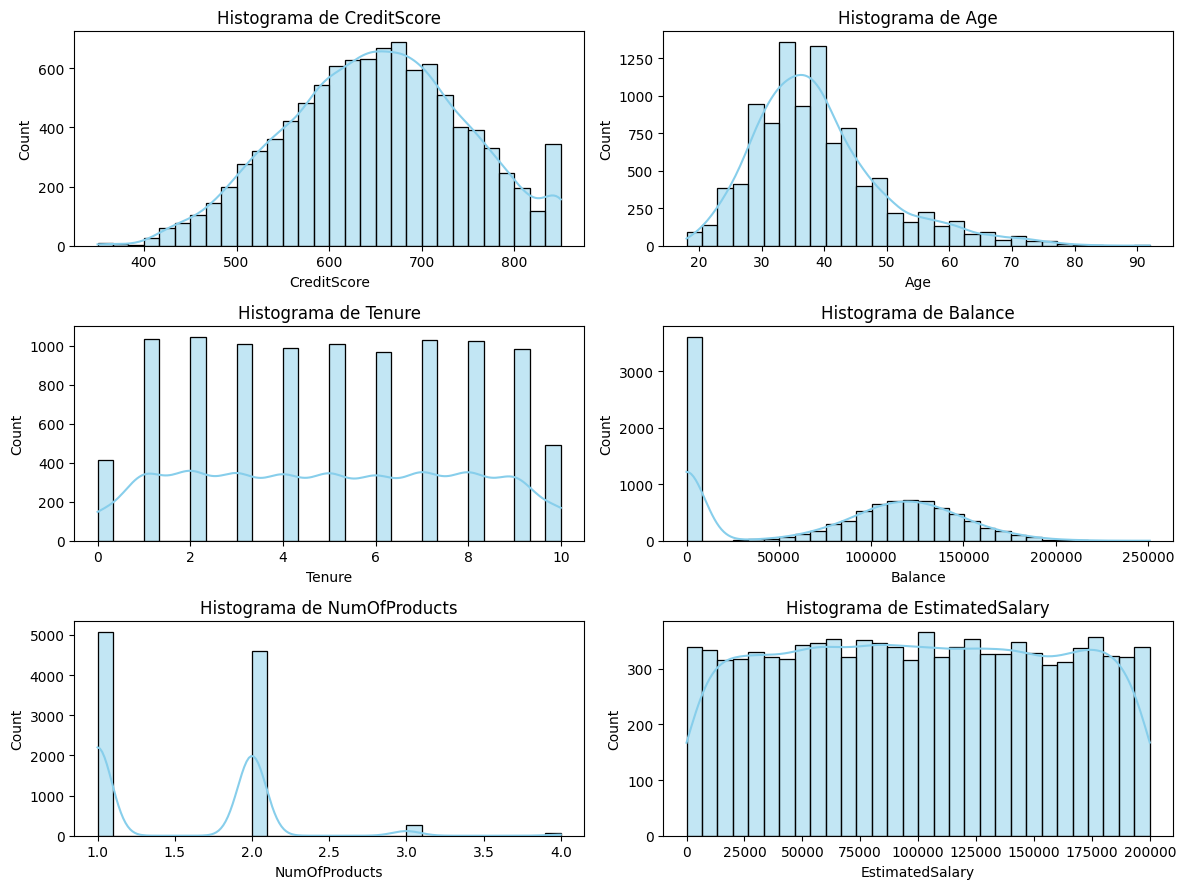

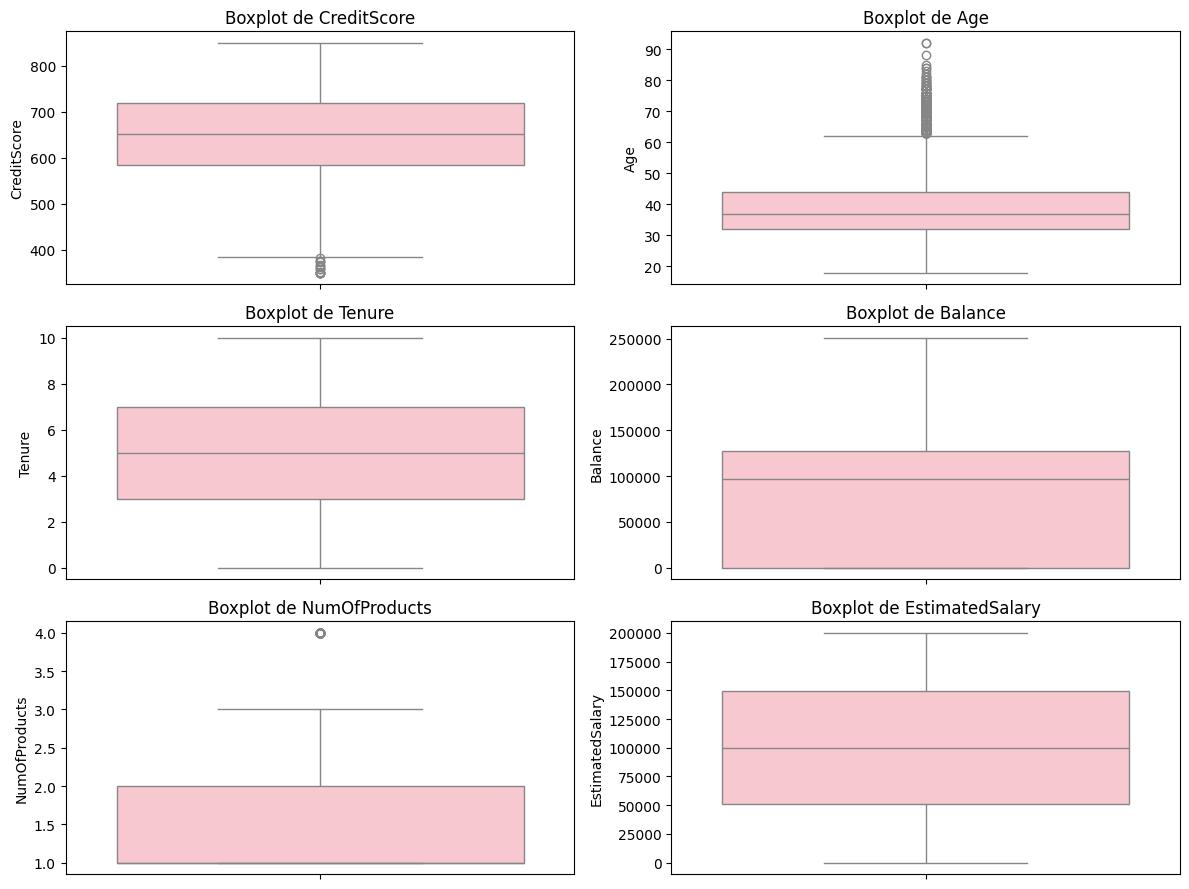

In [14]:
# Histogramas y boxplots de las columnas con valores numéricos

num_cols = len(CNum.columns)
num_rows = math.ceil(num_cols / 2) # Calcular el número de filas necesarias

# Histogramas
plt.figure(figsize = (12, num_rows * 3)) # Ajustar el alto del canvas de histogramas según las filas necesarias
for i, col in enumerate(CNum, 1):
    plt.subplot(num_rows, 2, i) # Posición del subplot en el canvas
    sns.histplot(CNum[col], bins=30, kde = True, color = 'skyblue') # Gráfico de histograma incluyendo curva de densidad
    plt.title(f'Histograma de {col}')
plt.tight_layout() # Espacio entre histogramas
plt.show()

# Boxplots
plt.figure(figsize = (12, num_rows * 3)) # Ajustar el alto del canvas de boxplots según las filas
for i, col in enumerate(CNum, 1):
    plt.subplot(num_rows, 2, i) # Posición del subplot en el canvas
    sns.boxplot(y = CNum[col], color = 'pink')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()



---

---

2.   **Gráficos de barras para variables categóricas (Geography, Gender, HasCrCard, IsActiveMember).**



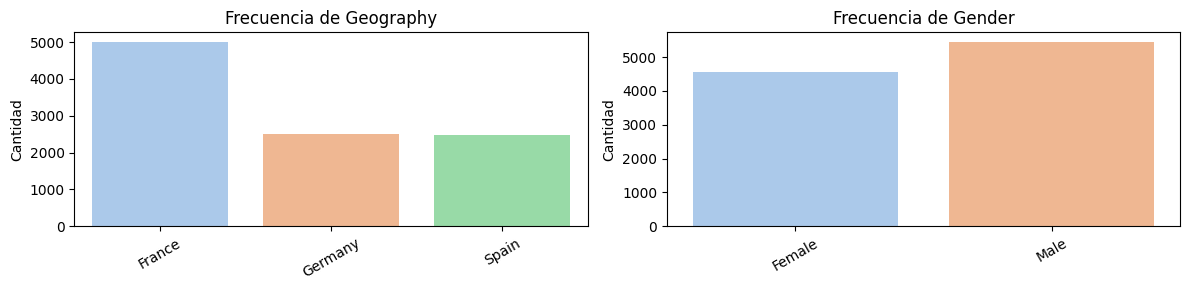


Tabla de frecuencias para Geography:
+----+-------------+--------------+
|    | Geography   |   Frecuencia |
+====+=============+==============+
|  0 | France      |         5014 |
+----+-------------+--------------+
|  1 | Germany     |         2509 |
+----+-------------+--------------+
|  2 | Spain       |         2477 |
+----+-------------+--------------+

Tabla de frecuencias para Gender:
+----+----------+--------------+
|    | Gender   |   Frecuencia |
+====+==========+==============+
|  0 | Male     |         5457 |
+----+----------+--------------+
|  1 | Female   |         4543 |
+----+----------+--------------+


In [15]:
# Histogramas y boxplots de las columnas con variables categóricas

CCate = ['Geography', 'Gender'] # No se grafican 'RowNumber','CustomerId'ni 'Surname'
CCate = datos[CCate]

cat_cols = len(CCate.columns)
cat_rows = math.ceil(cat_cols / 2) # Calcular el número de filas necesarias

# Gráficos de barras
plt.figure(figsize = (12, cat_rows * 3)) # Ajustar el alto del canvas del gráficos de barras según las filas necesarias
for i, col in enumerate(CCate, 1):
    plt.subplot(cat_rows, 2, i) # Posición del subplot en el canvas
    sns.countplot(x = CCate[col], hue = CCate[col], palette = "pastel", legend = False)
    plt.title(f'Frecuencia de {col}')
    plt.xlabel("")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=30)  # Rotar etiquetas para ajustar según su largo
plt.tight_layout()
plt.show()

from tabulate import tabulate

for col in CCate.columns:
    conteo = datos[col].value_counts().reset_index()
    conteo.columns = [col, 'Frecuencia']
    print(f"\nTabla de frecuencias para {col}:")
    print(tabulate(conteo, headers="keys", tablefmt="grid"))  # Formato de tabla

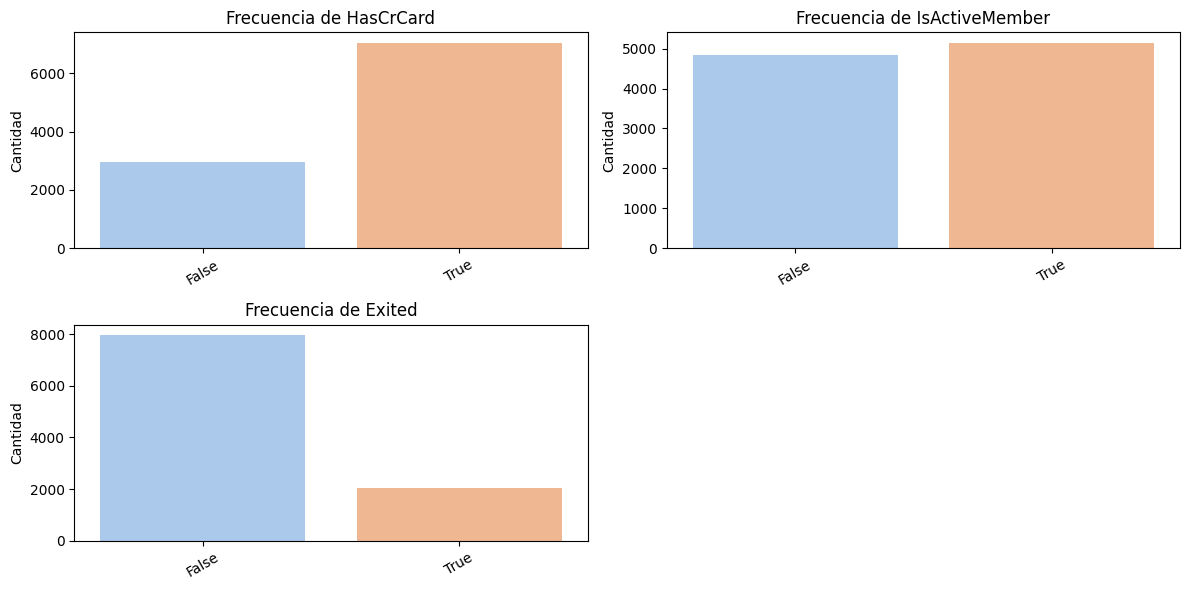


Tabla de frecuencias para HasCrCard:
+----+-------------+--------------+
|    | HasCrCard   |   Frecuencia |
+====+=============+==============+
|  0 | True        |         7055 |
+----+-------------+--------------+
|  1 | False       |         2945 |
+----+-------------+--------------+

Tabla de frecuencias para IsActiveMember:
+----+------------------+--------------+
|    | IsActiveMember   |   Frecuencia |
+====+==================+==============+
|  0 | True             |         5151 |
+----+------------------+--------------+
|  1 | False            |         4849 |
+----+------------------+--------------+

Tabla de frecuencias para Exited:
+----+----------+--------------+
|    | Exited   |   Frecuencia |
+====+==========+==============+
|  0 | False    |         7963 |
+----+----------+--------------+
|  1 | True     |         2037 |
+----+----------+--------------+


In [17]:
# Histogramas y boxplots de las columnas con variables booleanas

cat_cols = len(CBool.columns)
cat_rows = math.ceil(cat_cols / 2) # Calcular el número de filas necesarias

# Gráficos de barras
plt.figure(figsize = (12, cat_rows * 3)) # Ajustar el alto del canvas del gráficos de barras según las filas necesarias
for i, col in enumerate(CBool, 1):
    plt.subplot(cat_rows, 2, i) # Posición del subplot en el canvas
    sns.countplot(x = CBool[col], hue = CBool[col], palette = "pastel", legend = False)
    plt.title(f'Frecuencia de {col}')
    plt.xlabel("")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=30)  # Rotar etiquetas para ajustar según su largo
plt.tight_layout()
plt.show()

from tabulate import tabulate

for col in CBool.columns:
    conteo = datos[col].value_counts().reset_index()
    conteo.columns = [col, 'Frecuencia']
    print(f"\nTabla de frecuencias para {col}:")
    print(tabulate(conteo, headers="keys", tablefmt="grid"))  # Formato de tabla

---

---

3.   **Series temporales o análisis de tendencias (si se identifican datos relevantes en variables como Tenure o comportamientos a lo largo del tiempo).**

In [18]:
columnas_datetime = datos.select_dtypes(include=['datetime64'])

if not columnas_datetime.empty:
    print("Columnas de tipo datetime:", list(columnas_datetime.columns))
else:
    print("No hay columnas de tipo datetime.")

No hay columnas de tipo datetime.


Tenure
0.0      413
1.0     1035
2.0     1048
3.0     1009
4.0      989
5.0     1012
6.0      967
7.0     1028
8.0     1025
9.0      984
10.0     490
dtype: int64


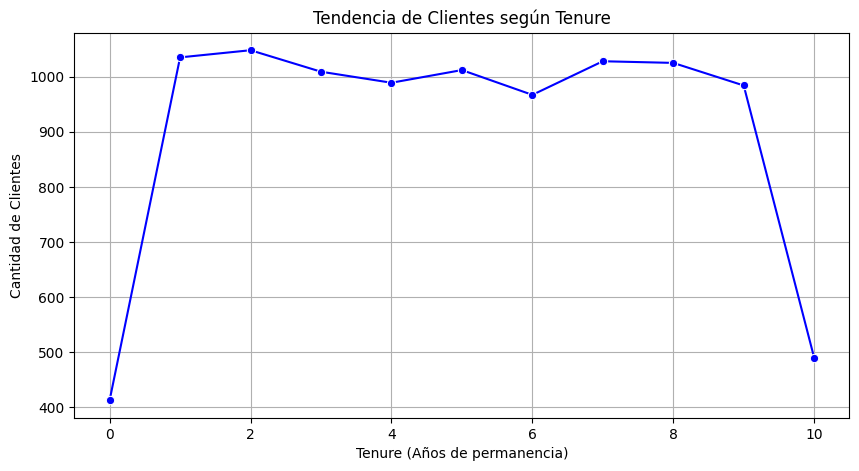

In [74]:
# Agrupar por Tenure y contar la cantidad de clientes
tenure_trend = datos.groupby('Tenure').size() # Esto nos entrega la totalidad de los clientes analizados según el Tenure
print(tenure_trend)

# Crear gráfico de línea para ver la tendencia
plt.figure(figsize=(10, 5))
sns.lineplot(x = tenure_trend.index, y = tenure_trend.values, marker = "o", color = "b")
plt.title("Tendencia de Clientes según Tenure")
plt.xlabel("Tenure (Años de permanencia)")
plt.ylabel("Cantidad de Clientes")
plt.grid(True)
plt.show()

Tenure
0.0       413
1.0      1448
2.0      2496
3.0      3505
4.0      4494
5.0      5506
6.0      6473
7.0      7501
8.0      8526
9.0      9510
10.0    10000
dtype: int64


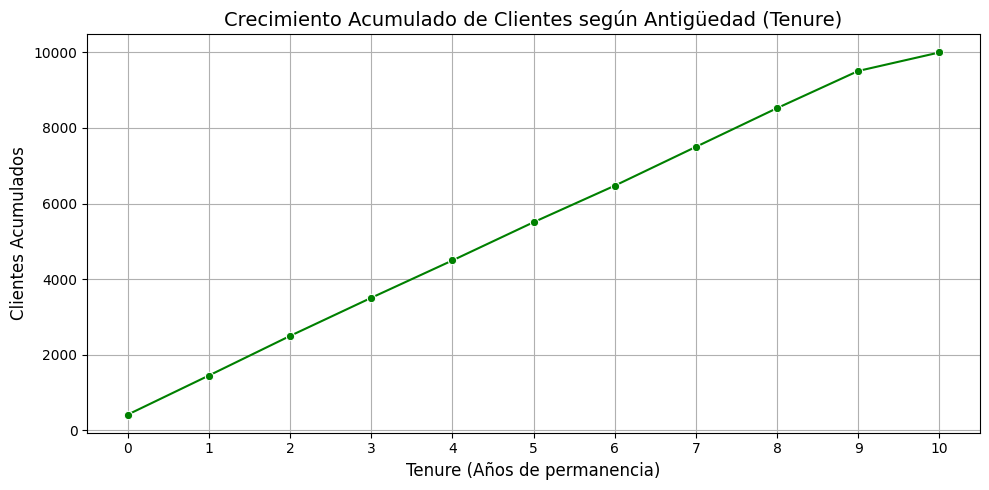

In [78]:
# Calcular acumulado de clientes en el tiempo
tenure_cumulative = tenure_trend.cumsum()
print(tenure_cumulative)

# Crear gráfico de línea acumulativa
plt.figure(figsize=(10, 5))
sns.lineplot(x=tenure_cumulative.index, y=tenure_cumulative.values, marker="o", color="green")

# Títulos y etiquetas
plt.title("Crecimiento Acumulado de Clientes según Antigüedad (Tenure)", fontsize=14)
plt.xlabel("Tenure (Años de permanencia)", fontsize=12)
plt.ylabel("Clientes Acumulados", fontsize=12)
plt.xticks(tenure_cumulative.index)
plt.grid(True)
plt.tight_layout()
plt.show()

---

---

4.   **Matrices de correlación que faciliten la identificación de relaciones entre variables.**

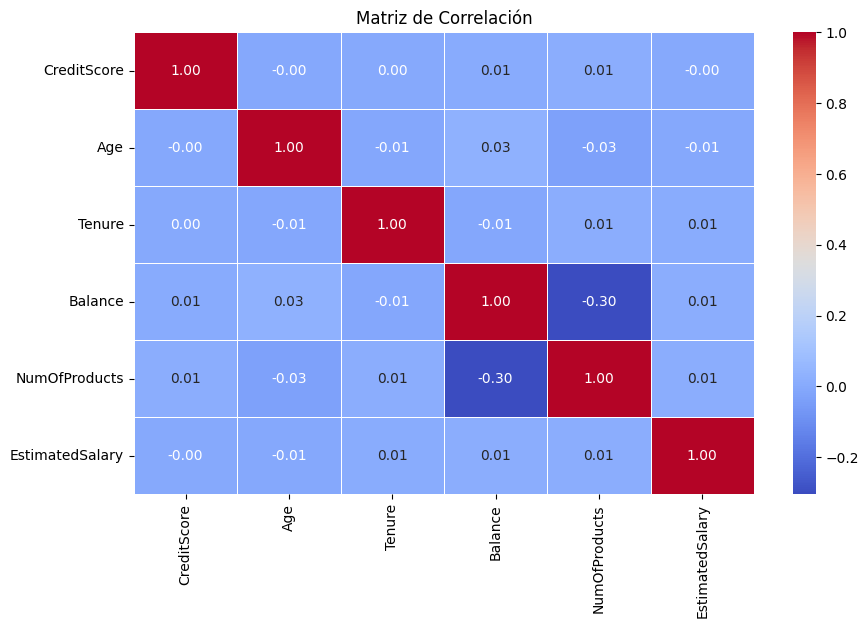

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   

                 EstimatedSalary  
CreditScore            -0.001384  
Age                    -0.007201  
Tenure                  0.007784  
Balance                 0.012797  
NumOfProducts           0.014204  
EstimatedSalary         1.000000  


In [20]:
# Calcular la matriz de correlación
corr_matrix = CNum.corr()

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Configuración de título
plt.title("Matriz de Correlación")
plt.show()

print(corr_matrix)

# **3. Visualizaciones Interactivas:**

*   Desarrollo de gráficos interactivos que permitan explorar dinámicamente el dataset y
profundizar en la identificación de patrones.

In [27]:
import plotly.express as px

# Agrupar los datos por Tenure y Exited
tenure_churn = datos.groupby(['Tenure', 'Exited']).size().reset_index(name='Count')

# Crear gráfico interactivo
fig = px.line(
    tenure_churn, # Clientes que abandonan en función de su Antigüedad
    x='Tenure',
    y='Count',
    color='Exited',
    markers=True,
    title='Cantidad de Clientes por Antigüedad (Tenure) y Abandono',
    labels={'Tenure': 'Antigüedad (años)', 'Count': 'Cantidad de Clientes', 'Exited': 'Abandonó'},
    color_discrete_map={0: 'blue', 1: 'red'}
)

fig.update_layout(template="plotly_white")
fig.show()

In [60]:
# Correlación entre la variable edad y clientes que abandonan

fig = px.histogram(datos, x='Age', color='Exited', barmode='overlay',
                   title='Distribución de Edad según Abandono', nbins=30)
fig.show()

AbandonoEdad = datos.groupby('Exited')['Age'].agg(['mean', 'median', 'std'])
print(AbandonoEdad)

             mean  median        std
Exited                              
False   37.408389    36.0  10.125363
True    44.837997    45.0   9.761562


In [62]:
# Correlación entre la variable Balance y clientes que abandonan

fig = px.box(datos, x='Exited', y='Balance', color='Exited',
             title='Distribución de Balance según Abandono')
fig.show()

AbandonoBal = datos.groupby('Exited')['Balance'].agg(['mean', 'median', 'std'])
print(AbandonoBal)

                mean     median           std
Exited                                       
False   72745.296779   92072.68  62848.040701
True    91108.539337  109349.29  58360.794816


In [63]:
# Correlación entre la variable NumOfProducts y clientes que abandonan

fig = px.histogram(datos, x='NumOfProducts', color='Exited', barmode='group',
                   title='Abandono según Número de Productos')
fig.show()

AbandonoNum = datos.groupby('Exited')['NumOfProducts'].agg(['mean', 'median', 'std'])
print(AbandonoNum)

            mean  median       std
Exited                            
False   1.544267     2.0  0.509536
True    1.475209     1.0  0.801521


In [64]:
# Correlación entre la variable IsActiveMember y clientes que abandonan

fig = px.histogram(datos, x='IsActiveMember', color='Exited', barmode='group',
                   title='Abandono según Actividad del Cliente')
fig.show()

In [58]:
# Correlación entre la variable Tenure y la Tasa de Abandono

tenure_total = datos['Tenure'].value_counts().sort_index()
Abandonotenure = (tenure_churn / tenure_total).fillna(0).reset_index()
Abandonotenure.columns = ['Tenure', 'Tasa de Abandono']

fig = px.line(Abandonotenure, x='Tenure', y='Tasa de Abandono',
              title='Tasa de Abandono según Años de Permanencia (Tenure)')
fig.show()

In [73]:
# Correlación entre la variable HasCrCard y clientes que abandonan

fig = px.histogram(datos, x='HasCrCard', color='Exited', barmode='group',
                   title='Abandono según si el Cliente tiene Tarjeta de Credito')
fig.show()

AbandonoCre = datos.groupby('Exited')['HasCrCard'].agg(['mean', 'median', 'std'])
print(AbandonoCre)

            mean  median       std
Exited                            
False   0.707146     1.0  0.455101
True    0.699067     1.0  0.458776


In [71]:
# Correlación entre la variable Geography y clientes que abandonan

fig = px.histogram(datos, x='Geography', color='Exited', barmode='group',
                   title='Abandono según la ubicación del Cliente')
fig.show()

In [72]:
# Correlación entre la variable Gender y clientes que abandonan

fig = px.histogram(datos, x='Gender', color='Exited', barmode='group',
                   title='Abandono según el género del Cliente')
fig.show()

# **4. Conclusiones:**

*    Una sección final donde se resuman los hallazgos clave del análisis, destacando las
tendencias y relaciones relevantes que podrían influir en la decisión de los clientes de
abandonar el banco.





**1.   Tasa de Abandono:**

El presente análisis se centra en la pérdida de clientes (CHURN), por lo que el primer paso es comprender el comportamiento de salida de los usuarios. Calculando el total de clientes que han abandonado el banco (Exited = 1) y dividiéndolo entre el total general de clientes, se obtuvo una Tasa de Abandono del 20.37%.

Este valor significa que 1 de cada 5 clientes ha dejado el banco, una proporción considerable que justifica investigar los factores asociados a esta decisión. A partir de esta métrica, se procede al análisis exploratorio de las variables disponibles para detectar patrones y diferencias entre quienes se quedaron y quienes se fueron.


**2.   Variables Categóricas:**

Analizando las variables categoricas, es posible concluir lo siguiente:

*   Geografía:  El país de origen muestra una tendencia significativa. Alemania presenta la mayor proporción de abandono, mientras que Francia y España tienen tasas más bajas, a pesar de que Francia concentra el mayor número de clientes. Esto sugiere que factores culturales o políticas específicas del banco en Alemania podrían estar afectando negativamente la experiencia del cliente, motivando su salida.
*   Género: Las mujeres presentan una mayor tasa de abandono en proporción, a pesar de que los hombres representan la mayoría de los clientes. Del total de 4,543 clientas, alrededor del 25% ha abandonado, frente al 16% de abandono entre los 5,457 hombres. Este hallazgo sugiere la necesidad de evaluar si existen diferencias en el trato, la experiencia del usuario o la percepción del servicio según el género, y si es necesario implementar estrategias específicas de retención para clientas.


**3.   Variables Numéricas:**

Analizando las variables Numéricas, es posible concluir lo siguiente:

*   Edad (Age): Los clientes que abandonan tienden a ser de mayor edad. Esto podría reflejar una baja accesibilidad a los servicios o canales de atención para personas mayores, una limitada adaptabilidad del banco a sus necesidades, o la complejidad en el uso de plataformas digitales.

*   Saldo (Balance): Aunque se podría pensar que los clientes con saldo cero son más propensos a abandonar, el análisis revela que incluso aquellos con altos balances también presentan una tasa de abandono elevada. De hecho, la mediana del balance entre los clientes que se retiran es mayor que la de quienes permanecen. Esto indica que el saldo no es un factor suficiente para asegurar la fidelización. De lo contrario, valdría la pena generar mayores beneficios según el saldo para impulsar la permanencia.

*   Antigüedad (Tenure): La mayor parte de los abandonos ocurre en los primeros 2 años de relación con el banco. A mayor antigüedad, la tasa de abandono disminuye, lo cual sugiere que fidelizar a los nuevos clientes en las etapas iniciales es clave. Invertir en canales de apoyo, onboarding efectivo y seguimiento temprano podría mejorar la retención.

*   Número de Productos (NumOfProducts): Los clientes que poseen solo un producto presentan una tasa de abandono considerablemente más alta que aquellos con dos o más, lo que indica que la diversificación de productos puede aumentar el nivel de compromiso del cliente con el banco.


**4. Variables Booleanas:**

Analizando las variables Booleanas, es posible concluir lo siguiente:

*   Actividad del cliente (IsActiveMember): Esta variable es una de las más influyentes. Los clientes activos presentan una tasa de abandono considerablemente menor, lo que sugiere que fomentar la actividad del cliente (interacción en plataformas, uso de servicios, asesorías personalizadas) puede ser una estrategia efectiva de retención.

*   Tarjeta de crédito (HasCrCard): Esta variable no muestra una diferencia tan marcada en la tasa de abandono. Sin embargo, hay una ligera menor proporción de salida entre los clientes que sí poseen tarjeta de crédito, lo que podría indicar que la inclusión de productos vinculados podría contribuir levemente a la permanencia, aunque no es concluyente por sí sola.




## Conclusiones de Análisis Descriptivo:

**Estadísticas descriptivas**

1.   CreditScore - La distribución del puntaje crediticio es simétrica, con media, mediana y moda cercanas, baja dispersión relativa y leve curtosis negativa, lo que indica estabilidad y ausencia de valores extremos.
2.   Age - La edad presenta una distribución asimétrica positiva (sesgo a la derecha), con mayor dispersión relativa y curtosis ligeramente leptocúrtica, sugiriendo mayor concentración en adultos jóvenes, pero presencia de valores altos.
3.   Tenure - Distribución casi simétrica pero con alta dispersión en los datos. La media y la mediana son muy pares pero la moda es menor lo que resalta la presencia de clientes más nuevos.
4.   Balance - El saldo en cuenta es altamente disperso, con curtosis negativa y leve asimetría izquierda, lo que refleja una gran desigualdad entre clientes con saldo nulo y otros con valores muy altos. La moda es cero pero la mediana mayor que la media.
5.   NumOfProducts - El número de productos tiene baja variabilidad, una moda clara en 1 producto y distribución sesgada positivamente, mostrando que la mayoría de los clientes contrata pocos productos.
6.   EstimatedSalary - El salario estimado tiene una distribución simétrica con alta dispersión, sin asimetría ni picos, lo que sugiere una distribución uniforme sin valores atípicos extremos.
7.   HasCrCard - La variable binaria de tarjeta de crédito está centrada en 1, con baja dispersión y sin sesgo, lo que indica una alta proporción de clientes con tarjeta.
8.   IsActiveMember - Ser miembro activo es una variable equilibrada con distribución aproximadamente binomial, aunque presenta alta variabilidad relativa respecto a su media.


